# Question 1 - Extracting Tesla Stock Data Using yfinance

In [23]:

#!pip install yfinance==0.1.67
#!pip install pandas==1.3.3

In [49]:

import yfinance as yf
import pandas as pd

In [207]:
tsla = yf.Ticker("TSLA")
tsla_share_price_data = tsla.history(period = "max")
tsla_share_price_data.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0
2010-07-07,3.280,3.326,2.996,3.160,34608500,0,0.0
2010-07-08,3.228,3.504,3.114,3.492,38557000,0,0.0
2010-07-09,3.516,3.580,3.310,3.480,20253000,0,0.0
2010-07-12,3.590,3.614,3.400,3.410,11012500,0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [30]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
#!mamba install bs4
#!mamba install html5lib
#!pip install lxml
#!pip install plotly==5.3.1

In [102]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [214]:
tsla_rev_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tsla_html_data = requests.get(tsla_rev_url).text
tsla_soup = BeautifulSoup(tsla_html_data, "html.parser")
tsla_soup.find_all('title')

[<title>Tesla Revenue 2009-2021 | TSLA | MacroTrends</title>]

In [215]:
tsla_revenue_data = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in tsla_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tsla_revenue_data = tsla_revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index = True)

tsla_revenue_data.dropna(inplace=True)
tsla_revenue_data = pd.DataFrame(tsla_revenue_data[tsla_revenue_data['Revenue'] != ""])
#tsla_revenue_data.head(10)
tsla_revenue_data.tail(10)

,Date,Revenue
39,2011-12-31,39
40,2011-09-30,58
41,2011-06-30,58
42,2011-03-31,49
43,2010-12-31,36
44,2010-09-30,31
45,2010-06-30,28
46,2010-03-31,21
48,2009-09-30,46
49,2009-06-30,27


# Question 3 - Question 3 -Extracting GameStop Stock Data Using yfinance

In [182]:
import yfinance as yf
import pandas as pd

In [213]:
gme = yf.Ticker("GME")
#gme_info = gme.info
gme_share_price_data = gme.history(period = "max")
gme_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
2002-02-14,6.850829,6.864295,6.682504,6.733002,2755400,0.0,0.0
2002-02-15,6.733003,6.749835,6.632008,6.699338,2097400,0.0,0.0
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [191]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [192]:
gme_rev_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_html_data = requests.get(gme_rev_url).text
gme_soup = BeautifulSoup(gme_html_data, "html.parser")
gme_soup.find_all('title')

In [216]:
gme_revenue_data = pd.DataFrame(columns = ['Date', 'Revenue'])

for row in gme_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue_data = gme_revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [217]:
gme_revenue_data.dropna(inplace=True)
gme_revenue_data = gme_revenue_data[gme_revenue_data['Revenue'] != ""]

In [218]:
gme_revenue_data.info()
#gme_revenue_data.tail(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     68 non-null     object
 1   Revenue  68 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


# Question 5 - Tesla Stock and Revenue Dashboard

<AxesSubplot:title={'center':'Stock'}, xlabel='Date'>

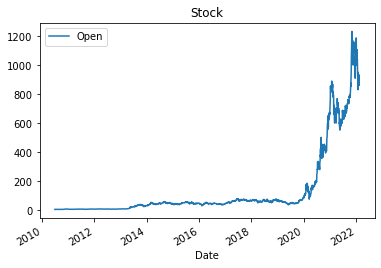

In [220]:
tsla_share_price_data.reset_index(inplace=True)
tsla_share_price_data.plot(x="Date", y="Open", title = "Stock")

In [221]:
tsla_revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     49 non-null     object
 1   Revenue  49 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


<AxesSubplot:title={'center':'Revenue'}, xlabel='Date'>

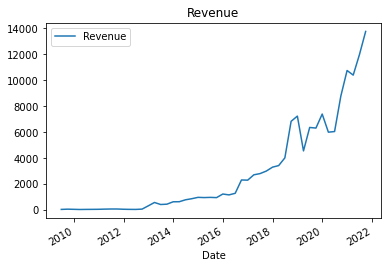

In [222]:
tsla_revenue_data['Revenue'] = tsla_revenue_data['Revenue'].astype(str).astype(int)
tsla_revenue_data['Date'] = pd.to_datetime(tsla_revenue_data['Date'])
tsla_revenue_data.plot( x="Date", y="Revenue", title = "Revenue")

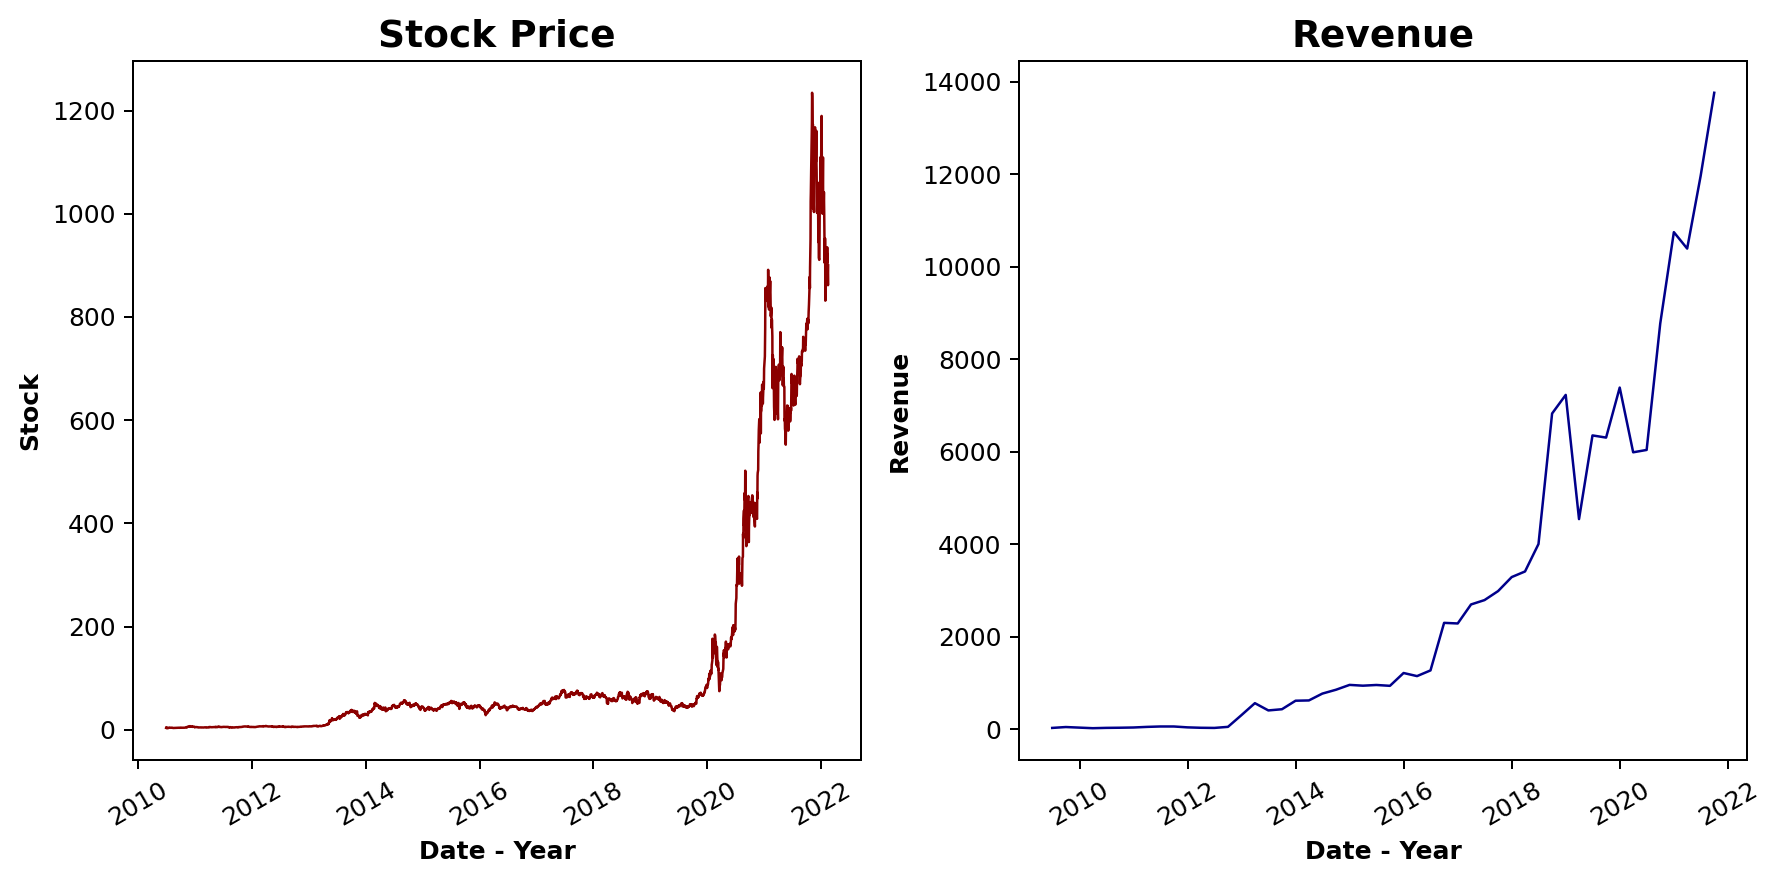

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#tsla_share_price_data.plot(x="Date", y="Open", title = "Stock")
figure(figsize=(10, 5), dpi=180)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(tsla_share_price_data['Date'], tsla_share_price_data['Open'], color = "DarkRed", linewidth = 1)
plt.title("Stock Price",size=15,fontweight="bold")
plt.xlabel('Date - Year',size=10,fontweight="bold")
plt.ylabel('Stock',size=10,fontweight="bold")
plt.xticks(rotation=30)


#tsla_revenue_data.plot( x="Date", y="Revenue", title = "Revenue")
plt.subplot(1, 2, 2) # index 2
plt.plot(tsla_revenue_data['Date'], tsla_revenue_data['Revenue'], color = "DarkBlue", linewidth = 1)
plt.title("Revenue", size=15,fontweight="bold")
plt.xlabel('Date - Year',size=10,fontweight="bold")
plt.ylabel('Revenue',size=10,fontweight="bold")
plt.xticks(rotation=30)
#figure(figsize=(15, 10), dpi=80)


plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Stock'}, xlabel='Date'>

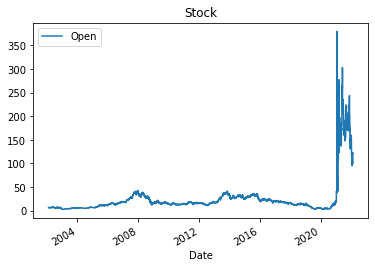

In [223]:
gme_share_price_data.reset_index(inplace=True)
gme_share_price_data.plot(x="Date", y="Open", title = "Stock")

<AxesSubplot:title={'center':'Revenue'}, xlabel='Date'>

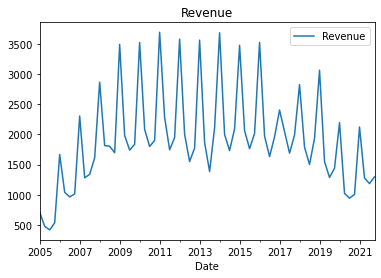

In [224]:
gme_revenue_data['Revenue'] = gme_revenue_data['Revenue'].astype(str).astype(int)
gme_revenue_data['Date'] = pd.to_datetime(gme_revenue_data['Date'])
gme_revenue_data.plot( x="Date", y="Revenue", title = "Revenue")

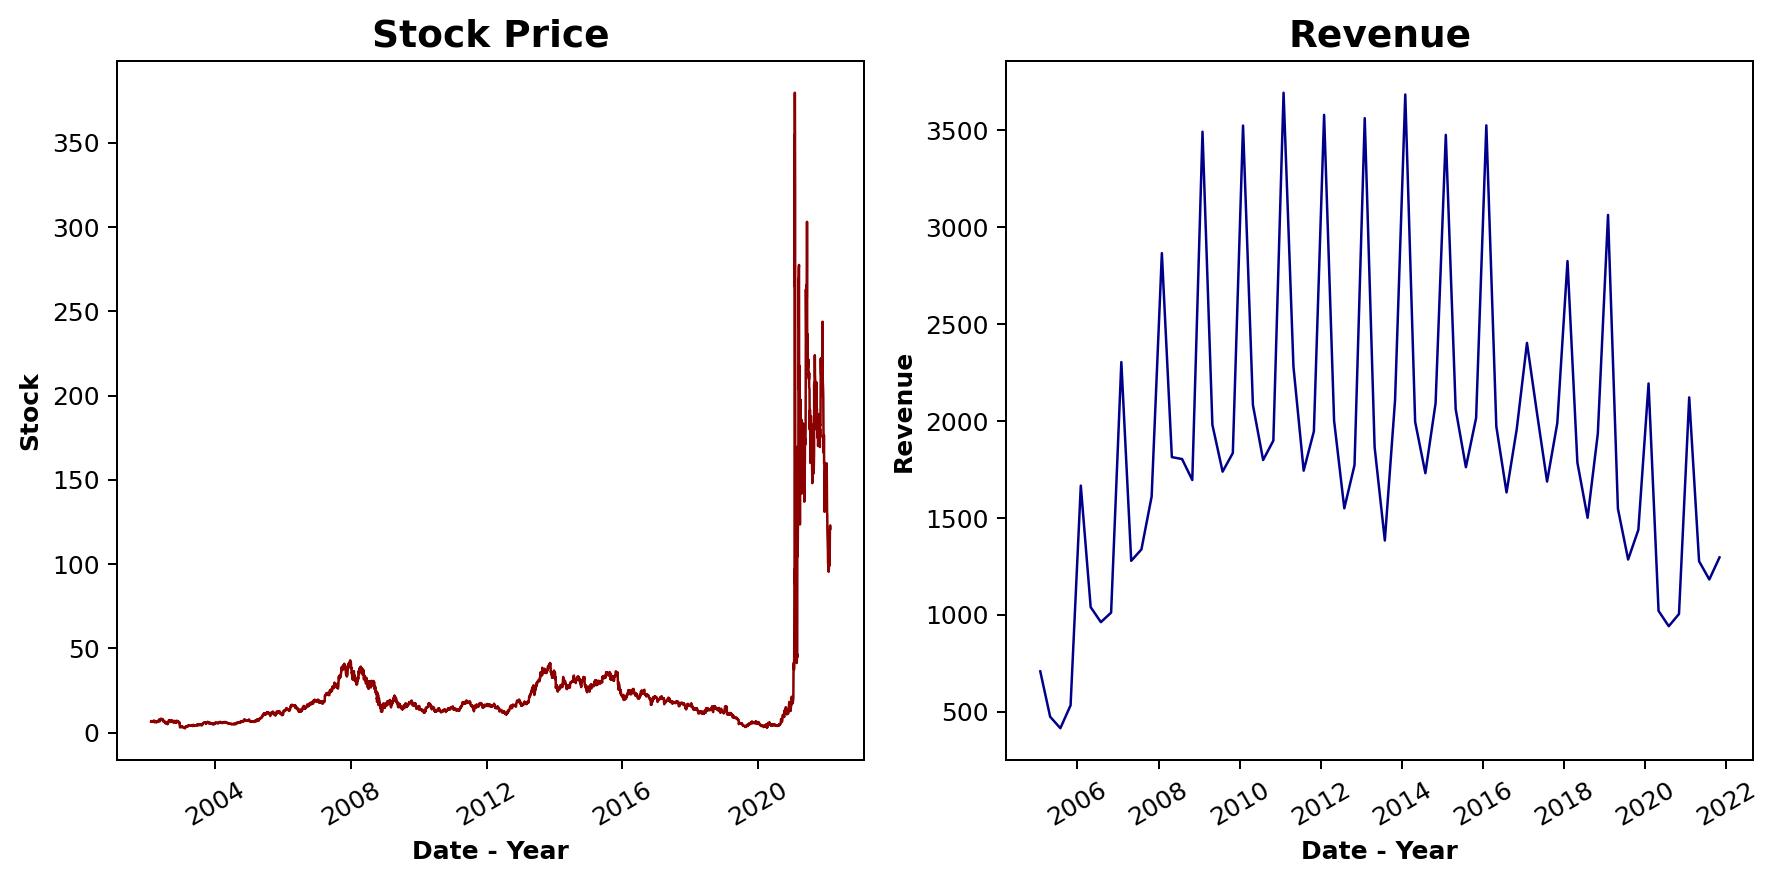

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#tsla_share_price_data.plot(x="Date", y="Open", title = "Stock")
figure(figsize=(10, 5), dpi=180)
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(gme_share_price_data['Date'], gme_share_price_data['Open'], color = "DarkRed", linewidth = 1)
plt.title("Stock Price",size=15,fontweight="bold")
plt.xlabel('Date - Year',size=10,fontweight="bold")
plt.ylabel('Stock',size=10,fontweight="bold")
plt.xticks(rotation=30)


#tsla_revenue_data.plot( x="Date", y="Revenue", title = "Revenue")
plt.subplot(1, 2, 2) # index 2
plt.plot(gme_revenue_data['Date'], gme_revenue_data['Revenue'], color = "DarkBlue", linewidth = 1)
plt.title("Revenue", size=15,fontweight="bold")
plt.xlabel('Date - Year',size=10,fontweight="bold")
plt.ylabel('Revenue',size=10,fontweight="bold")
plt.xticks(rotation=30)
#figure(figsize=(15, 10), dpi=80)


plt.tight_layout()
plt.show()